In [1]:
%pip install albumentations

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.6/290.6 KB 4.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 23.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.6/443.6 KB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 KB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip show albumentations

Name: albumentations
Version: 2.0.5
Summary: Fast, flexible, and advanced augmentation library for deep learning, computer vision, and medical imaging. Albumentations offers a wide range of transformations for both 2D (images, masks, bboxes, keypoints) and 3D (volumes, volumetric masks, keypoints) data, with optimized performance and seamless integration into ML workflows.
Home-page: 
Author: Vladimir Iglovikov
Author-email: 
License: MIT License
        
        Copyright (c) 2017 Vladimir Iglovikov, Alexander Buslaev, Alexander Parinov,
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, su

In [30]:
import os
import cv2
import numpy as np
import albumentations as A

# 로컬 디렉토리에서 이미지를 읽어오는 함수
def read_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"이미지 파일을 찾을 수 없습니다: {image_path}")
    return cv2.imread(image_path)[:, :, ::-1]  # OpenCV는 BGR로 이미지를 읽으므로 RGB로 변환합니다.

# 이미지 경로 정의
image_path = "./data/test.jpg"  # 원본 이미지 경로
reference_image_path = "./data/rain1.jpg"  # 참조 이미지 경로

# 이미지 로드
image = read_image(image_path)
reference_image = read_image(reference_image_path)

# Pixel Distribution Adaptation 설정
transform = A.PixelDistributionAdaptation(
    reference_images=[reference_image_path],
    blend_ratio=(0.5, 1.0),
    transform_type="standard",
    read_fn=read_image,  # read_fn으로 사용자 정의 함수 사용
    p=1.0
)

# 변환 수행
result = transform(image=image)
adapted_image = result["image"]

# 결과 확인
print("변환 완료!")

변환 완료!


In [31]:
reference_image = cv2.resize(reference_image, (image.shape[1], image.shape[0]))


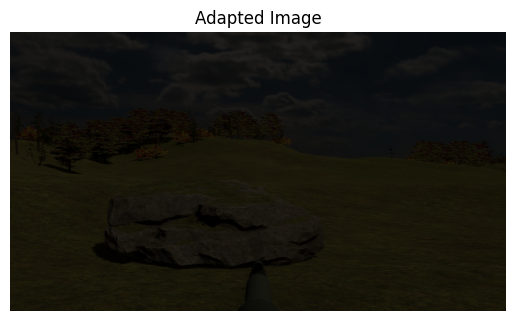

In [32]:
import matplotlib.pyplot as plt

# matplotlib을 이용해 시각화
plt.imshow(adapted_image)
plt.title("Adapted Image")
plt.axis("off")
plt.show()

In [15]:
cv2.imwrite("./data/night.jpg", adapted_image[:, :, ::-1])  # 다시 BGR로 바꿔 저장


True